<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #630fbdff, #251734ff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Wine Quality Prediction using Random Forest
    </h1>
</div>


<h4 style="color:#7613e0ff">1. Importing Required Libraries for Data Analysis Visualization Preprocessing and Classification with Random Forest</h4>


In [379]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


<h4 style="color:#7613e0ff">2. Loading the Wine Quality Dataset and Displaying Basic Information</h4>

In [380]:
wine_data=pd.read_csv(r'C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\Wine Quality Prediction\Data\winequality-red.csv')
print(wine_data.shape)
print("----------")
wine_data

(1599, 12)
----------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h4 style="color:#7613e0ff">3. Generating Descriptive Statistics and Displaying Dataset Information Summary</h4>


In [381]:
x=wine_data.describe()
y=wine_data.info()
z=pd.concat([x,y],axis=1)
z

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h4 style="color:#7613e0ff">4. Checking for Missing Values and Examining the Distribution of Wine Quality Scores</h4>


In [382]:
print(wine_data.isna().sum().sum()) 
print("-----------------------")
print(wine_data['quality'].value_counts().sort_values())

0
-----------------------
quality
3     10
8     18
4     53
7    199
6    638
5    681
Name: count, dtype: int64


<h4 style="color:#7613e0ff">5. Visualizing the Distribution of Wine Quality Ratings Using Count Plot</h4>


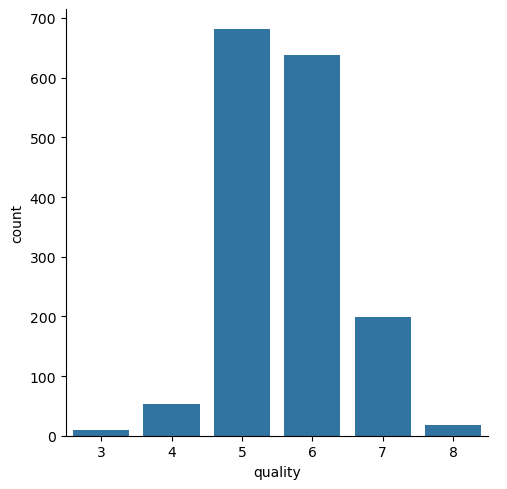

In [383]:
sns.catplot(x='quality', data=wine_data, kind='count')

<h4 style="color:#7613e0ff">6. Exploring the Relationship Between Wine Quality Levels and Volatile Acidity</h4>


<Axes: xlabel='quality', ylabel='volatile acidity'>

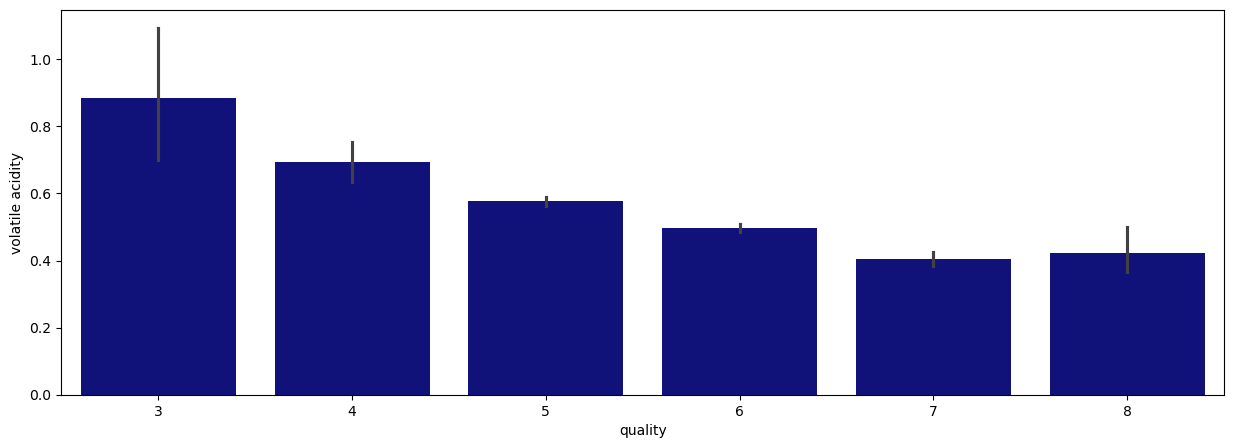

In [384]:
plt.figure(figsize=(15,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_data,color="darkblue")

<h4 style="color:#7613e0ff">7. Exploring the Relationship Between Wine Quality Levels and Citric Acid Concentration</h4>


<Axes: xlabel='quality', ylabel='citric acid'>

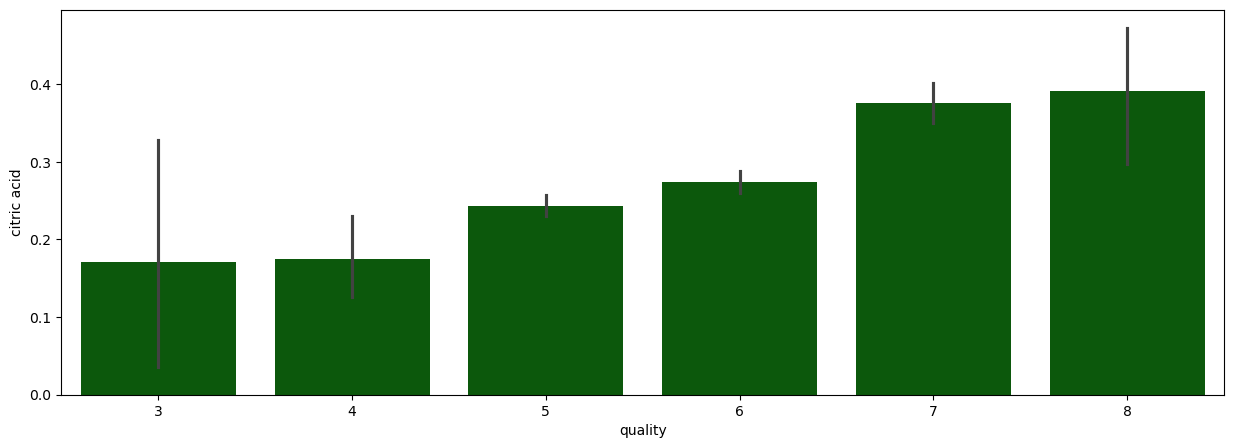

In [385]:
plt.figure(figsize=(15,5))
sns.barplot(x='quality', y='citric acid', data=wine_data,color="darkgreen")

<h4 style="color:#7613e0ff">8. Visualizing the Correlation Heatmap to Understand Relationships Between Wine Features</h4>


Text(145.72222222222223, 0.5, 'Features')

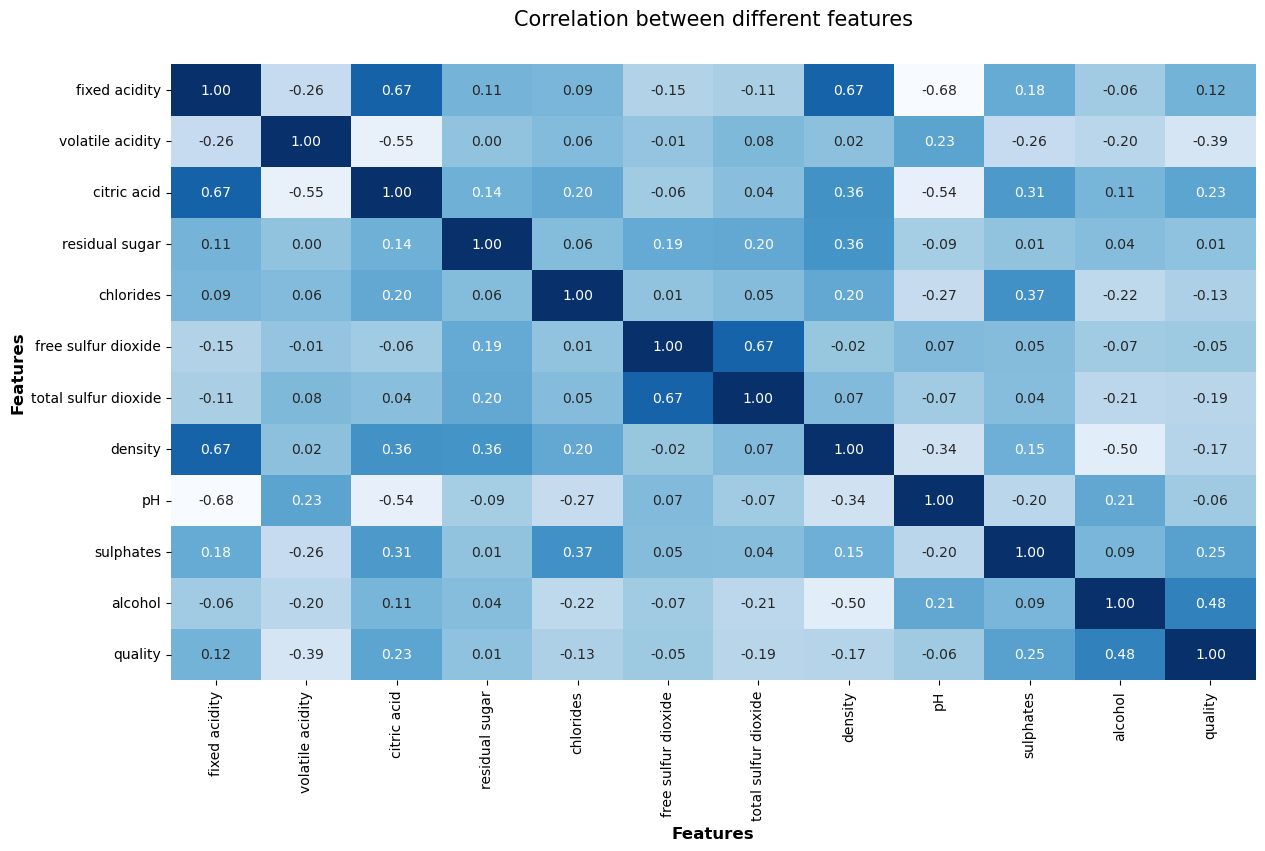

In [386]:
plt.figure(figsize=(14, 8))
sns.heatmap(wine_data.corr(),annot=True,fmt=".2f",cbar=False,cmap="Blues")
plt.title("Correlation between different features",y=1.05,size=15) 
plt.xlabel("Features",fontsize=12,weight='bold')
plt.ylabel("Features",fontsize=12,weight='bold')

<h4 style="color:#7613e0ff">9. Separating Feature Variables from Target and Encoding Wine Quality into Binary Classes</h4>


In [387]:
X=wine_data.drop('quality',axis=1)
Y=wine_data['quality'].apply(lambda x: 0 if x<7 else 1)
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<h4 style="color:#7613e0ff">10. Splitting the Dataset into Training and Testing Sets and Training the Random Forest Classifier</h4>


In [388]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
model=RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

<h4 style="color:#7613e0ff">11. Evaluating Model Accuracy on Test Data to Measure Generalization Performance</h4>


In [389]:
y_pred=model.predict(X_test)
acurr=accuracy_score(Y_test,y_pred)
print(acurr)

0.94375


<h4 style="color:#7613e0ff">12. Evaluating Model Accuracy on Training Data to Assess Potential Overfitting</h4>


In [390]:
y_pred=model.predict(X_train)
acurr=accuracy_score(Y_train,y_pred)
print(acurr)

1.0


<h4 style="color:#7613e0ff">13. Calculating the F1 Score on Test Data to Measure the Balance Between Precision and Recall</h4>


In [391]:
y_pred=model.predict(X_test)
f1score=f1_score(y_pred,Y_test)
print(f1score)

0.75


<h4 style="color:#7613e0ff">14. Generating the Classification Report on Test Data to Evaluate Precision Recall and F1 Score of the Model</h4>

In [392]:
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320



<h4 style="color:#7613e0ff">15. Visualizing the Confusion Matrix to Evaluate Prediction Results of the Random Forest Model</h4>


<Axes: >

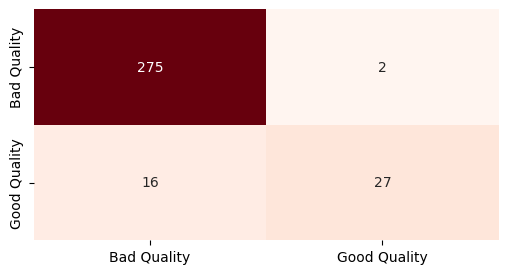

In [393]:
plt.figure(figsize=(6,3))
y_pred=model.predict(X_test)
conx=confusion_matrix(Y_test,y_pred)
sns.heatmap(conx, annot=True, fmt="d",cbar=False,cmap="Reds",xticklabels=['Bad Quality','Good Quality'],yticklabels=['Bad Quality','Good Quality'])

<h4 style="color:#7613e0ff">16. Plotting the ROC Curve and Calculating the AUC Score for Model Performance Evaluation</h4>

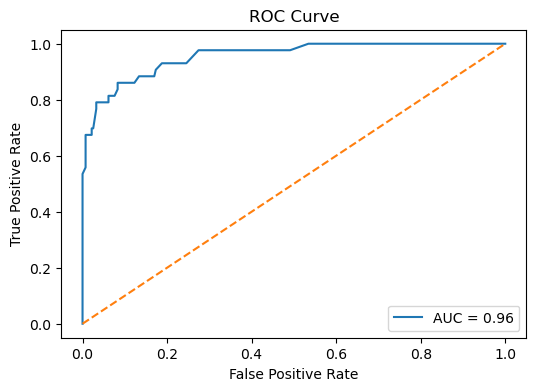

In [394]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


<h4 style="color:#7613e0ff">17. Testing the Trained Random Forest Model with Sample Wine Data Points to Predict Wine Quality</h4>

In [395]:
x=(7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8) # bad quality=5
y=(9.4,0.41,0.48,4.6,0.07200000000000001,10.0,20.0,0.9973,3.34,0.79,12.2) # good quality=7
x=np.asarray(x).reshape(1,-1)
y=np.asarray(y).reshape(1,-1)
ok1=model.predict(x)
ok2=model.predict(y)
if ok1==1: print("Good Quality Wine")
else: print("Bad Quality Wine")
if ok2==1: print("Good Quality Wine")
else: print("Bad Quality Wine")

Bad Quality Wine
Good Quality Wine


c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
